# Import Libraries and Load Dataset

In [1]:
#\-- IMPORT MODULES, CLASSES AND METHODS --/#

import zipfile                          #############################
import os                               # || FILE SYSTEM / UTILS || #
import copy                             #############################
from prettytable import PrettyTable
import copy

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
from sklearn.ensemble import IsolationForest
import numpy as np                  ###################################
import pandas as pd                 # || EXPLORATIVE DATA ANALYSIS || #
import matplotlib.pyplot as plt     ###################################
import seaborn as sns
# https://towardsdatascience.com/handling-missing-data-like-a-pro-part-3-model-based-multiple-imputation-methods-bdfe85f93087 NumPyro, impyute,

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

import sklearn
import re
import importlib
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn import naive_bayes                         #########################
from sklearn import neural_network                      #  |-----------------|  #
from sklearn import svm                                 # || MODEL SELECTION || #
from sklearn import tree                                #  |-----------------|  #
from sklearn import linear_model                        #########################

# from PrunedCV import PrunedCV

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold     ##########################
from sklearn.model_selection import ParameterGrid       # || MODEL VALIDATION || #
                                                        ##########################
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline


from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import re
from datetime import datetime, timedelta



# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////











#\-- SET ENVIRONMENT --/#
# Before starting we need to store the data properly. We define an ad-hoc folder where we will store everything.
main_PATH = os.getcwd()

# We check whether we already have the data.                        
if 'data' not in os.listdir():                                      
                                                                    
    # Unzip files.
    with zipfile.ZipFile(r'summer_project_dataset.zip') as zip_ref:

        os.mkdir(main_PATH + '/data')   # We create the 'data' directory,
        os.chdir(main_PATH + '/data')   # we change directory,
    
        data_PATH = os.getcwd()         # we get the data path
        zip_ref.extractall(data_PATH)   # and we unzip there.       #####################
                                                                    # || FILE SYSTEM || #    
    file_PATH = data_PATH + '/summer_project_dataset'               #####################

else:

    # We just build the paths.
    data_PATH = main_PATH + '/data'
    file_PATH = data_PATH + '/summer_project_dataset'

# Finally, we go back to our main path.
os.chdir(main_PATH)

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# We also set a seed for reproducibility purposes.      #####################
SEED = 42                                               # || RANDOM SEED || #
np.random.seed(SEED)                                    #####################

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# LaTeX style plots.
plt.rcParams['figure.figsize'] = (12, 8)
# plt.rcParams['text.usetex']    = True         ############################
# plt.rcParams['font.family']    = 'serif'      # || DEFAULT PARAMETERS || #
# plt.rcParams['font.size']      = '10'         ############################

pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_rows', 10)





# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////






#\-- DATASET LOADING AND PREPROCESSING --/#
# Aome variables are stored as float, but they are actually int. Two reasons why:
#       -) nan values are considered as float --> first estimate them and then change the data type.
#       -) there are inconsistencies, especially in kw_max_min where some int values are float instead.
# for the moment just let's store everything as float, but further inspections are needed.

data_types = {
              'url' : str, 'timedelta' : int, 'shares' : int, 'data_channel' : str, 'weekday' : str, 
              
              'n_tokens_title'          : int, 'n_tokens_content'       : int, 'n_unique_tokens' : float, 'n_non_stop_words' : float,
              'n_non_stop_unique_tokens': float, 'average_token_length' : float,

              'num_hrefs' : int, 'num_self_hrefs' : int, 'num_imgs' : float, 'num_videos' : float,
              
              'kw_min_min' : float, 'kw_max_min' : float, 'kw_avg_min' : float, 'kw_min_max' : float, 'kw_max_max'   : float,
              'kw_avg_max' : float, 'kw_min_avg' : float, 'kw_max_avg' : float, 'kw_avg_avg' : float, 'num_keywords' : float,
              
              'self_reference_min_shares' : float, 'self_reference_max_shares' : float, 'self_reference_avg_sharess' : float,
              
              'LDA_00' : float, 'LDA_01' : float, 'LDA_02' : float, 'LDA_03' : float, 'LDA_04' : float,
              
              'global_subjectivity' : float, 'global_sentiment_polarity' : float, 'global_rate_positive_words' : float, 'global_rate_negative_words' : float,
              
              'rate_positive_words' : float, 'rate_negative_words' : float,
              
              'avg_positive_polarity' : float, 'min_positive_polarity' : float, 'max_positive_polarity' : float, 'avg_negative_polarity' : float,
              'min_negative_polarity' : float, 'max_negative_polarity' : float,

              'title_subjectivity' : float, 'title_sentiment_polarity' : float, 'abs_title_subjectivity' : float, 'abs_title_sentiment_polarity' : float,
              }                                                    
                                                                   
                                                                   
df = pd.read_csv(file_PATH + r'/development.csv',                 
                   usecols = lambda column: column != 'id', dtype = data_types)              
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,http://mashable.com/2014/09/08/safest-cabbies-...,121,12,1015,0.422018,1.0,0.545031,10,6,33.0,...,-0.160714,-0.500000,-0.071429,0.000000,0.000,0.500000,0.000,2900,bus,tuesday
1,http://mashable.com/2013/07/25/3d-printed-rifle/,532,9,503,0.569697,1.0,0.737542,9,0,NaN,...,-0.157500,-0.250000,-0.100000,0.000000,0.000,0.500000,0.000,1300,tech,thursday
2,http://mashable.com/2013/10/30/digital-dinosau...,435,9,232,0.646018,1.0,0.748428,12,3,4.0,...,-0.427500,-1.000000,-0.187500,0.000000,0.000,0.500000,0.000,17700,lifestyle,wednesday
3,http://mashable.com/2014/08/27/homer-simpson-i...,134,12,171,0.722892,1.0,0.867925,9,5,0.0,...,-0.216667,-0.250000,-0.166667,0.400000,-0.250,0.100000,0.250,1500,bus,wednesday
4,http://mashable.com/2013/01/10/creepy-robotic-...,728,11,286,0.652632,1.0,0.800000,5,2,NaN,...,-0.251786,-0.500000,-0.100000,0.200000,-0.100,0.300000,0.100,1400,tech,thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,http://mashable.com/2014/11/30/star-wars-guard...,37,11,440,0.564103,1.0,0.718978,10,2,NaN,...,-0.209167,-0.316667,-0.050000,0.000000,0.000,0.500000,0.000,1000,world,tuesday
31711,http://mashable.com/2014/11/14/uk-floods/,52,14,0,0.000000,0.0,0.000000,0,0,0.0,...,0.000000,0.000000,0.000000,0.666667,-0.700,0.166667,0.700,11000,lifestyle,monday
31712,http://mashable.com/2014/09/08/paypal-bitcoin-...,121,9,969,0.489583,1.0,0.710623,6,5,2.0,...,-0.400000,-1.000000,-0.050000,0.000000,0.000,0.500000,0.000,2400,tech,tuesday
31713,http://mashable.com/2013/08/23/mashable-androi...,503,11,1976,0.412308,1.0,0.621080,21,3,1.0,...,-0.323413,-1.000000,-0.050000,0.700000,-0.400,0.200000,0.400,6000,lifestyle,friday


In [2]:
dev_df = pd.read_csv('data/summer_project_dataset/development.csv')
eval_df = pd.read_csv('data/summer_project_dataset/evaluation.csv')

dev_df.shape, eval_df.shape

((31715, 50), (7917, 49))

In [3]:
dev_df.columns, eval_df.columns

(Index(['id', 'url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
        'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
        'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
        'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
        'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
        'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
        'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
        'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
        'global_sentiment_polarity', 'global_rate_positive_words',
        'global_rate_negative_words', 'rate_positive_words',
        'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
        'max_positive_polarity', 'avg_negative_polarity',
        'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
        'title_sentiment_polarity', 'abs_title_subjectivity',
        'abs

# Missing & Duplicates Values

In [4]:
df.duplicated().sum() # There are no duplicates.

0

In [5]:
# count missing values of images and videos and num_keywords
print("Missing values of images: ", df['num_imgs'].isnull().sum())
print("Missing values of videos: ", df['num_videos'].isnull().sum())
print("Missing values of num_keywords: ", df['num_keywords'].isnull().sum())


Missing values of images:  6375
Missing values of videos:  6331
Missing values of num_keywords:  6318


In [6]:
# we will now with the mean , later with the real value by the scraping work

df['num_imgs'].fillna(df['num_imgs'].mean(), inplace=True)
df['num_videos'].fillna(df['num_videos'].mean(), inplace=True)
df['num_keywords'].fillna(df['num_keywords'].mean(), inplace=True)


print()
print(df.isna().sum())


url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
data_channel                    0
weekday                         0
Length: 49, dtype: int64


# Shares variable

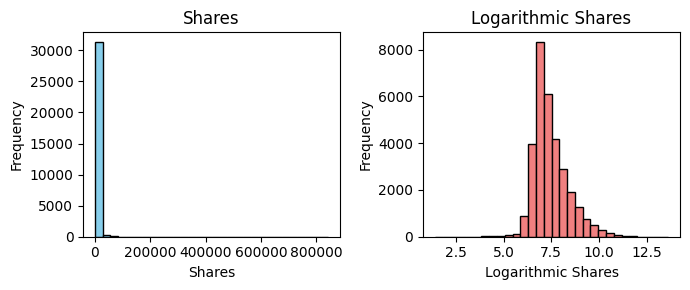

In [7]:
def plot_shares(df):
    """
    This function plots two visualizations for the 'shares' column in the given DataFrame.
    """
    fig, axes = plt.subplots(1, 2, figsize=(7, 3))

    # Plot 1: Histogram
    axes[0].hist(df['shares'], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title('Shares')
    axes[0].set_xlabel('Shares')
    axes[0].set_ylabel('Frequency')

    # Plot 2: Logarithmic Transformation
    axes[1].hist(np.log(df['shares']), bins=30, color='lightcoral', edgecolor='black')
    axes[1].set_title('Logarithmic Shares')
    axes[1].set_xlabel('Logarithmic Shares')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()



plot_shares(df)

# Shares has a skewed distribution, so we will apply a logarithmic transformation to it.

# Fill Url

In [8]:
# The highest values of shares seems unrealistic.
# A more detailed analysis with https://archive.org/web/ has confirmed that the values are not correct.
# So we manually set the values to the correct ones.


from url_utils import fill_url

df = fill_url(df)

# Tokens columns

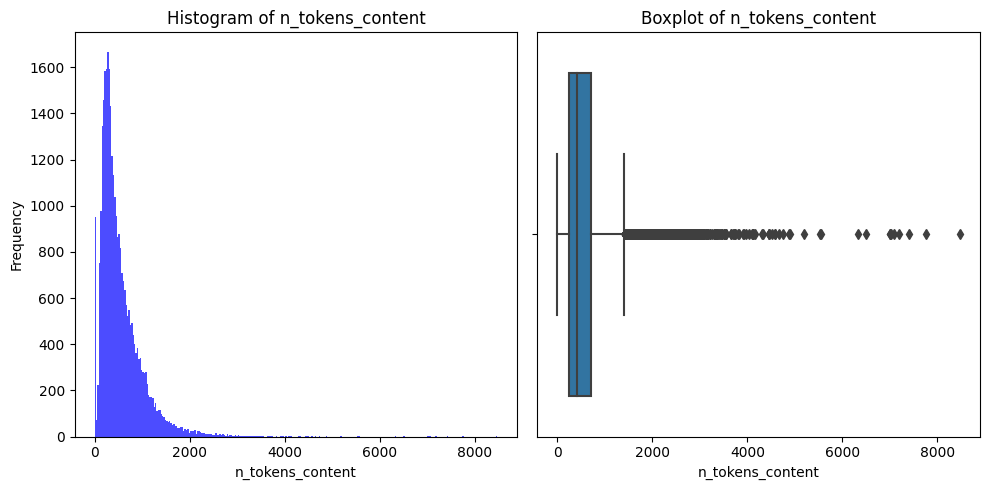

In [9]:

def plot_histogram_boxplot(df, column):
    """
    This function plots a histogram and a boxplot for a specified column in a DataFrame.
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the histogram
    axes[0].hist(df[column], bins='auto', color='blue', alpha=0.7)
    axes[0].set_title('Histogram of {}'.format(column))
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Plot the boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title('Boxplot of {}'.format(column))
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()


plot_histogram_boxplot(df, 'n_tokens_content')

/Users/matteodonadio/Desktop/Poli/Data Science Lab/Project2023/DSL-Online-News-Popularity/preprocessor.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.__dataframe__[columns] = log_transformed_data


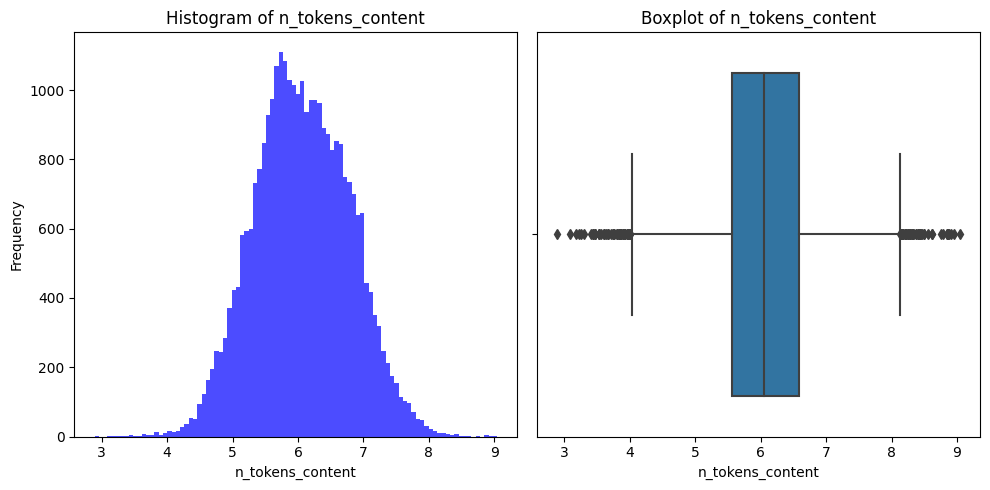

In [10]:
from preprocessor import Preprocessing
df_preprocessed = Preprocessing(df)


# A lot of values are 0, it means that the article has no content.
# We will drop these rows.
_ = df_preprocessed.discard_zeros('n_tokens_content')

# The distribution is still skewed, so we will apply a logarithmic transformation to it.
_ = df_preprocessed.apply_log('n_tokens_content')

plot_histogram_boxplot(df_preprocessed.get_dataframe(), 'n_tokens_content')



Text(0.5, 1.0, 'Distribution and cumulative distribution of some of tokens columns')

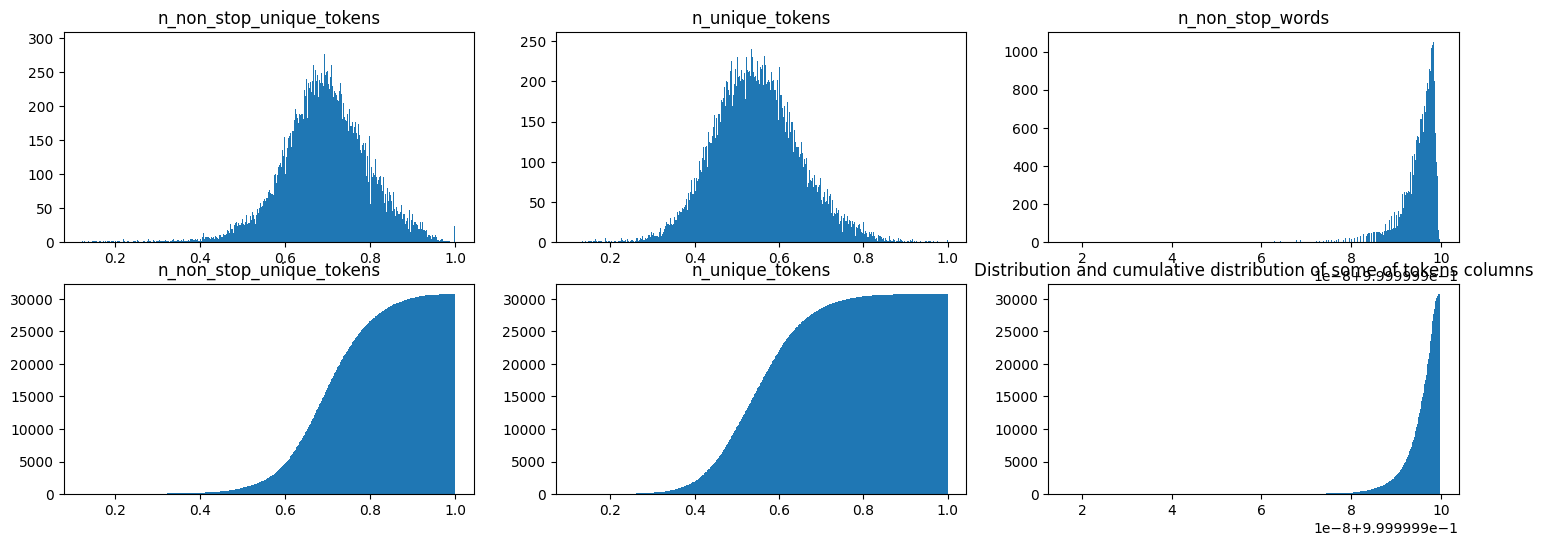

In [11]:
# Plot the distribution and cumulative distribution of some of tokens columns.

fig, ax = plt.subplots(2, 3, figsize = (18, 6))

_ = ax[0, 0].hist(df_preprocessed.get_dataframe()['n_non_stop_unique_tokens'], bins = 500)
ax[0, 0].set_title('n_non_stop_unique_tokens')
_ = ax[0, 1].hist(df_preprocessed.get_dataframe()['n_unique_tokens'], bins = 500)
ax[0, 1].set_title('n_unique_tokens')
_ = ax[0, 2].hist(df_preprocessed.get_dataframe()['n_non_stop_words'], bins = 500)
ax[0, 2].set_title('n_non_stop_words')
_ = ax[1, 0].hist(df_preprocessed.get_dataframe()['n_non_stop_unique_tokens'], bins = 500, cumulative = True)
ax[1, 0].set_title('n_non_stop_unique_tokens')
_ = ax[1, 1].hist(df_preprocessed.get_dataframe()['n_unique_tokens'], bins = 500, cumulative = True)
ax[1, 1].set_title('n_unique_tokens')
_ = ax[1, 2].hist(df_preprocessed.get_dataframe()['n_non_stop_words'], bins = 500, cumulative = True)
ax[1, 2].set_title('n_non_stop_words')
plt.title('Distribution and cumulative distribution of some of tokens columns')

Text(0.5, 1.0, 'Correlation between tokens columns')

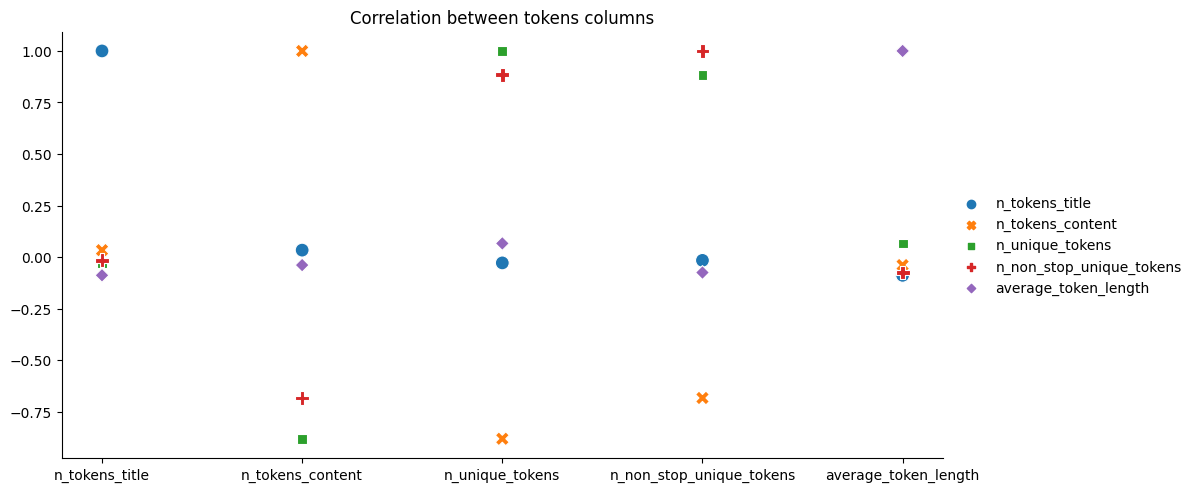

In [12]:
# Let's see the correlation between these columns.

corr_tokens = df_preprocessed.get_dataframe().loc[:, ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'average_token_length']].corr()
_ = sns.relplot(corr_tokens, height = 5, aspect = 2, s = 100)
plt.title('Correlation between tokens columns')

* n_unique_tokens strongly positively correlated to n_non_stop_unique_tokens > 0.85
* n_tokens_content strongly negatively correlated to n_unique_tokens < -0.75    correlate negativamente quindi tanto piu è lunga tanto meno i tokens unici

* n_tokens_content quite positively correlated to n_non_stop_unique_tokens > 0.60

We can safely discard some features. We choose to <br>

**KEEP**
* n_unique_tokens

**DISCARD**
* n_non_stop_unique_tokens
* n_tokens_content




In [13]:
# Discard n_tokens_content

_ = df_preprocessed.drop('n_tokens_content')

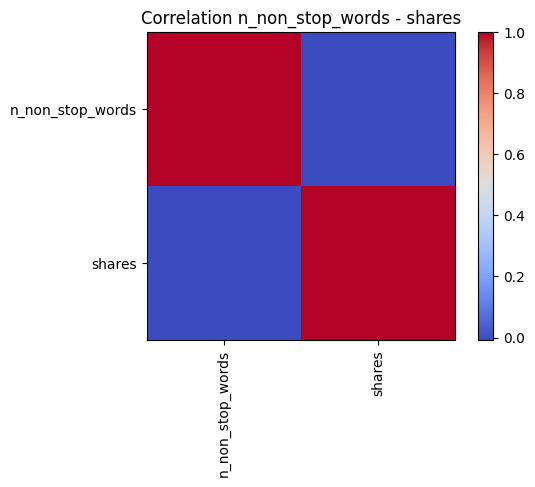

In [14]:
#Correlation n_non_stop_words - shares


corr = df_preprocessed.get_dataframe().loc[:, ['n_non_stop_words', 'shares']].corr()

plt.figure(figsize=(6, 4))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(corr.columns))
plt.xticks(tick_marks, corr.columns, rotation='vertical')
plt.yticks(tick_marks, corr.columns)
plt.title('Correlation n_non_stop_words - shares')
plt.show()

In [15]:
# No correlation between n_non_stop_words and the target variable.
# Drop the column.
_ = df_preprocessed.drop('n_non_stop_words')

# Weekday column

Difference between the two means: 764



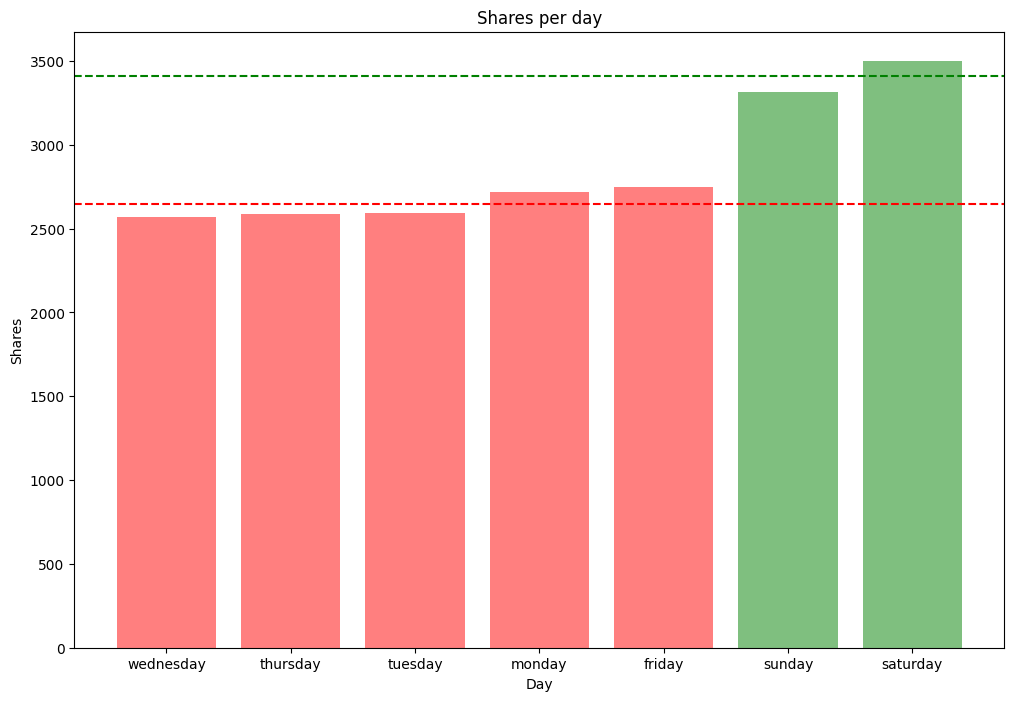

In [16]:
# Let's see the shares per day of the week.


shares_per_day = df_preprocessed.get_dataframe().groupby('weekday')['shares'].sum()
n_weekdays     = df_preprocessed.get_dataframe().groupby('weekday').size()

normalized_shares_per_day = shares_per_day / n_weekdays 
plt.bar(x = normalized_shares_per_day.sort_values().index, height = normalized_shares_per_day.sort_values().values, color = ['red', 'red','red','red','red', 'green', 'green'], alpha = 0.5)
plt.title('Shares per day')
plt.xlabel('Day')
plt.ylabel('Shares')
plt.axhline(y = normalized_shares_per_day.sort_values().iloc[0:5].mean(), linestyle = "dashed", color = 'red')
plt.axhline(y = normalized_shares_per_day.sort_values().iloc[5:7].mean(), linestyle = "dashed", color = 'green')

print(f'Difference between the two means: {normalized_shares_per_day.sort_values().iloc[5:7].mean() - normalized_shares_per_day.sort_values().iloc[0:5].mean():.0f}\n')

In [17]:
# There is a difference between the two means, so we will create a new column to encode this information.
# We can distinguish between weekend and midweek days.

# Encode weekdays into weekend and midweek days.
_ = df_preprocessed.encode_weekdays()

# Reference columns

Text(0.5, 1.0, 'Correlation between reference columns')

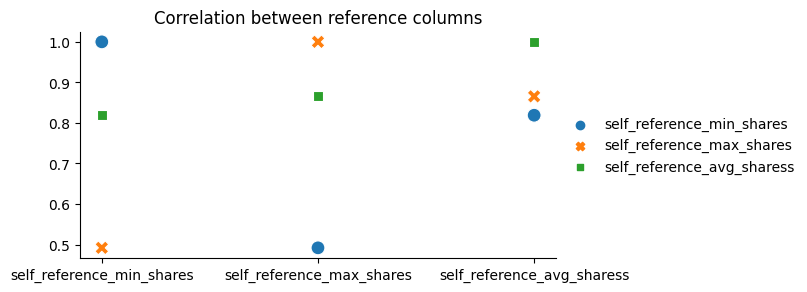

In [18]:
# Let's see the correlation in reference columns

corr_reference = df_preprocessed.get_dataframe().loc[:, ['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']].corr()

_ = sns.relplot(corr_reference, height = 3, aspect = 2, s = 100)
plt.title('Correlation between reference columns')

* self_reference_avg_sharess strongly positively correlated to self_reference_max_shares > 0.85
* self_reference_avg_sharess strongly positively correlated to self_reference_min_shares > 0.80

We can safely discard some features. We choose to <br>

**KEEP**
* self_reference_avg_sharess

**DISCARD**
* self_reference_max_shares
* self_reference_min_shares


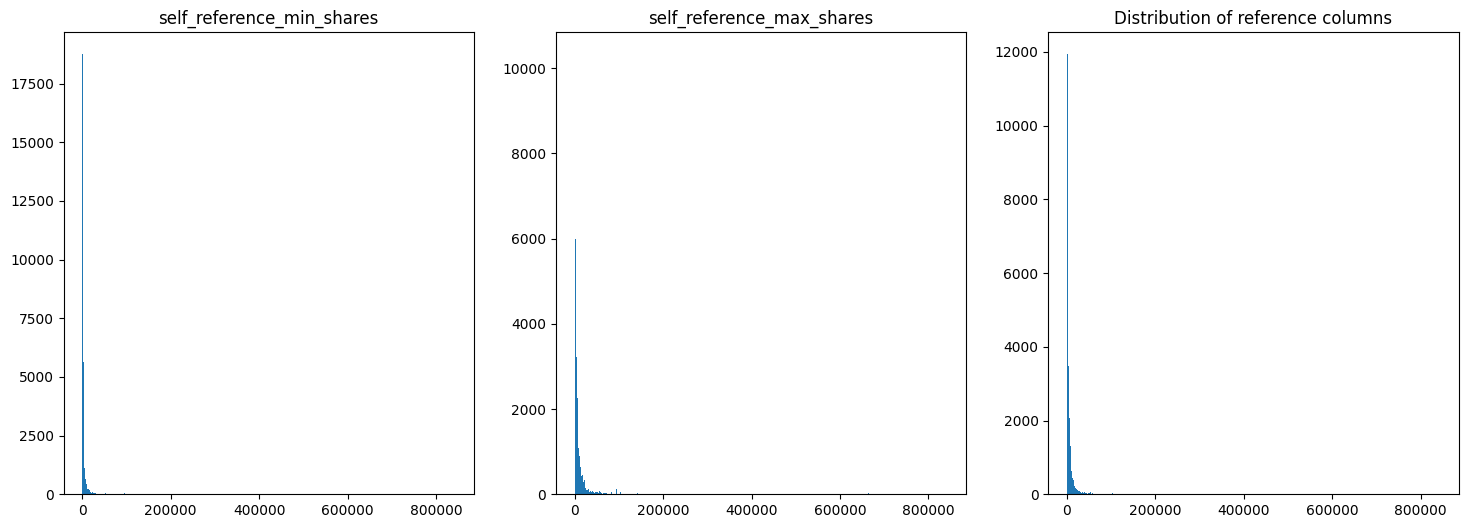

In [19]:
# Analyze distribution of self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

_ = ax[0].hist(df_preprocessed.get_dataframe()['self_reference_min_shares'], bins=500)
ax[0].set_title('self_reference_min_shares')
_ = ax[1].hist(df_preprocessed.get_dataframe()['self_reference_max_shares'], bins=500)
ax[1].set_title('self_reference_max_shares')
_ = ax[2].hist(df_preprocessed.get_dataframe()['self_reference_avg_sharess'], bins=500)
ax[2].set_title('self_reference_avg_sharess')
plt.title('Distribution of reference columns')
plt.show()


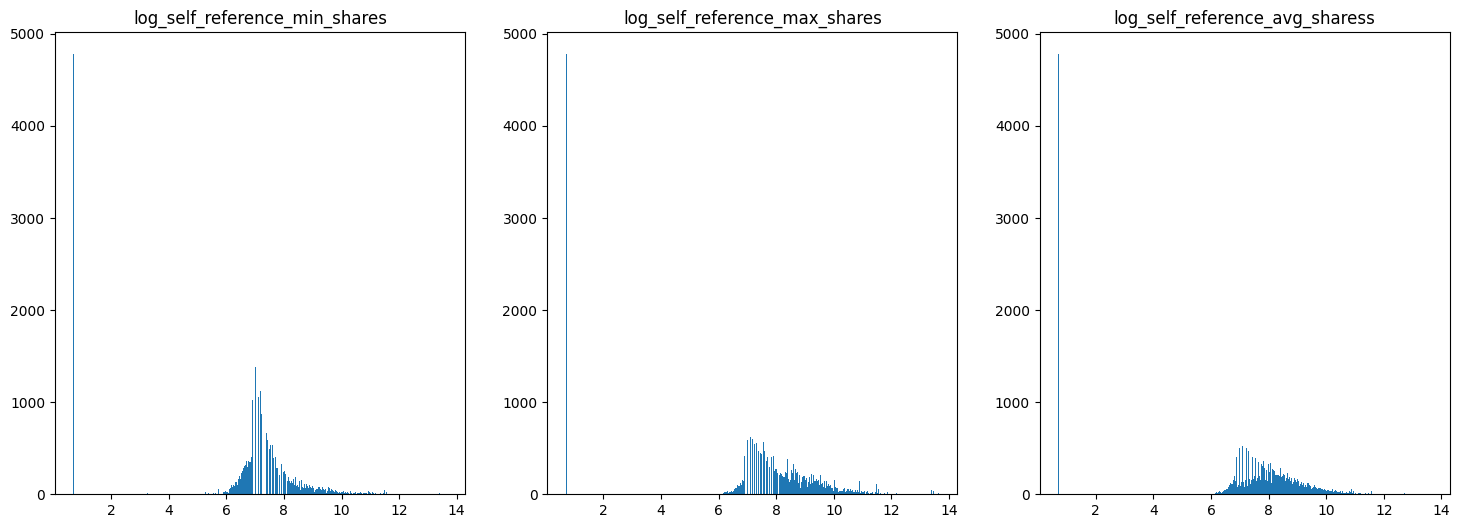

In [20]:
# Apply logarithmic transformation to self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess
# Since there are a lot of zeros, we apply log1p instead of log.

df_preprocessed.apply_log1p('self_reference_min_shares')
df_preprocessed.apply_log1p('self_reference_max_shares')
df_preprocessed.apply_log1p('self_reference_avg_sharess')

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

_ = ax[0].hist(df_preprocessed.get_dataframe()['self_reference_min_shares'], bins=500)
ax[0].set_title('log_self_reference_min_shares')
_ = ax[1].hist(df_preprocessed.get_dataframe()['self_reference_max_shares'], bins=500)
ax[1].set_title('log_self_reference_max_shares')
_ = ax[2].hist(df_preprocessed.get_dataframe()['self_reference_avg_sharess'], bins=500)
ax[2].set_title('log_self_reference_avg_sharess')

plt.show()


Text(0.5, 1.0, 'Correlation between reference columns')

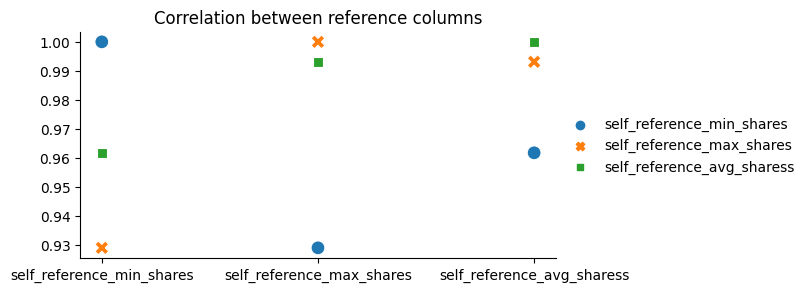

In [21]:
# Analize correlation 

corr_reference = df_preprocessed.get_dataframe().loc[:, ['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']].corr()

_ = sns.relplot(corr_reference, height = 3, aspect = 2, s = 100)
plt.title('Correlation between reference columns')

* global_sentiment_polarity strongly positively correlated to rate_positive_words > 0.75
* global_sentiment_polarity strongly negatively correlated to rate_negative_words < -0.75


We can safely discard some features. We choose to <br>

**Two Hypothesis**


**FIRST HYPHOTESIS**
**KEEP**
* global_sentiment_polarity

**DISCARD**
* rate_positive_words
* rate_negative_words




**SECOND HYPHOTESIS**
* in order to preserve the information of all these three variables we make a linear combination, giving more importance on the avg shares


**We choose for the second**

In [22]:
weights = {
    'self_reference_min_shares' : 0.2,
    'self_reference_avg_sharess' : 0.6,
    'self_reference_max_shares' : 0.2
    }


df_preprocessed.apply_log1p(list(weights.keys()))
df_preprocessed.make_combination(weights, 'self_reference')

,url,timedelta,n_tokens_title,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday,self_reference
0,http://mashable.com/2014/09/08/safest-cabbies-...,121,12,0.422018,0.545031,10,6,33.000000,1.0000,4.656158,...,-0.500000,-0.071429,0.000000,0.000000,0.500000,0.000000,2900,bus,Not Weekend,2.362985
1,http://mashable.com/2013/07/25/3d-printed-rifle/,532,9,0.569697,0.737542,9,0,4.533899,1.0000,4.576541,...,-0.250000,-0.100000,0.000000,0.000000,0.500000,0.000000,1300,tech,Not Weekend,0.990710
2,http://mashable.com/2013/10/30/digital-dinosau...,435,9,0.646018,0.748428,12,3,4.000000,1.0000,4.935345,...,-1.000000,-0.187500,0.000000,0.000000,0.500000,0.000000,17700,lifestyle,Not Weekend,2.463904
3,http://mashable.com/2014/08/27/homer-simpson-i...,134,12,0.722892,0.867925,9,5,0.000000,1.2591,4.970760,...,-0.250000,-0.166667,0.400000,-0.250000,0.100000,0.250000,1500,bus,Not Weekend,2.282336
4,http://mashable.com/2013/01/10/creepy-robotic-...,728,11,0.652632,0.800000,5,2,4.533899,0.0000,5.006993,...,-0.500000,-0.100000,0.200000,-0.100000,0.300000,0.100000,1400,tech,Not Weekend,2.164950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31709,http://mashable.com/2014/10/15/the-superhero-m...,84,11,0.500000,0.703008,9,0,1.000000,1.0000,4.372587,...,-1.000000,-0.125000,0.288889,-0.155556,0.211111,0.155556,684,lifestyle,Not Weekend,0.990710
31710,http://mashable.com/2014/11/30/star-wars-guard...,37,11,0.564103,0.718978,10,2,4.533899,1.2591,4.784091,...,-0.316667,-0.050000,0.000000,0.000000,0.500000,0.000000,1000,world,Not Weekend,2.304690
31712,http://mashable.com/2014/09/08/paypal-bitcoin-...,121,9,0.489583,0.710623,6,5,2.000000,1.0000,4.594427,...,-1.000000,-0.050000,0.000000,0.000000,0.500000,0.000000,2400,tech,Not Weekend,2.300569
31713,http://mashable.com/2013/08/23/mashable-androi...,503,11,0.412308,0.621080,21,3,1.000000,3.0000,4.353239,...,-1.000000,-0.050000,0.700000,-0.400000,0.200000,0.400000,6000,lifestyle,Not Weekend,2.420330


# Topic and polarity

Text(0.5, 1.0, 'Correlation between polarity columns')

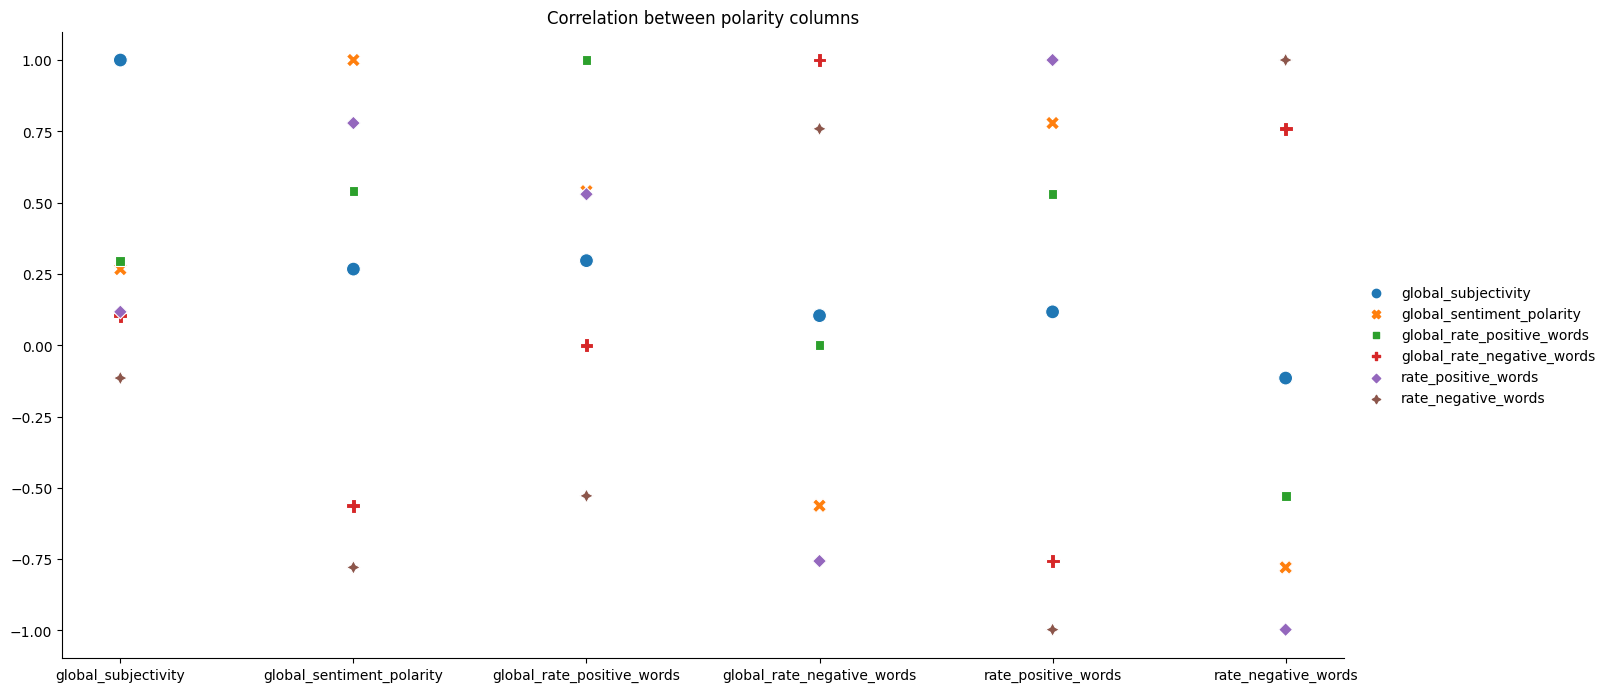

In [23]:
corr_polarity = df_preprocessed.get_dataframe().loc[:, ['global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words']].corr()
_ = sns.relplot(corr_polarity, height = 7, aspect = 2, s = 100)
plt.title('Correlation between polarity columns')

In [24]:
_ = df_preprocessed.drop('rate_positive_words')
_ = df_preprocessed.drop('rate_negative_words')

* global_sentiment_polarity strongly positively correlated to rate_positive_words > 0.75
* global_sentiment_polarity strongly negatively correlated to rate_negative_words < -0.75


We can safely discard some features. We choose to <br>

**KEEP**
* global_sentiment_polarity

**DISCARD**
* rate_positive_words
* rate_negative_words


Text(0.5, 1.0, 'Correlation between polarity columns')

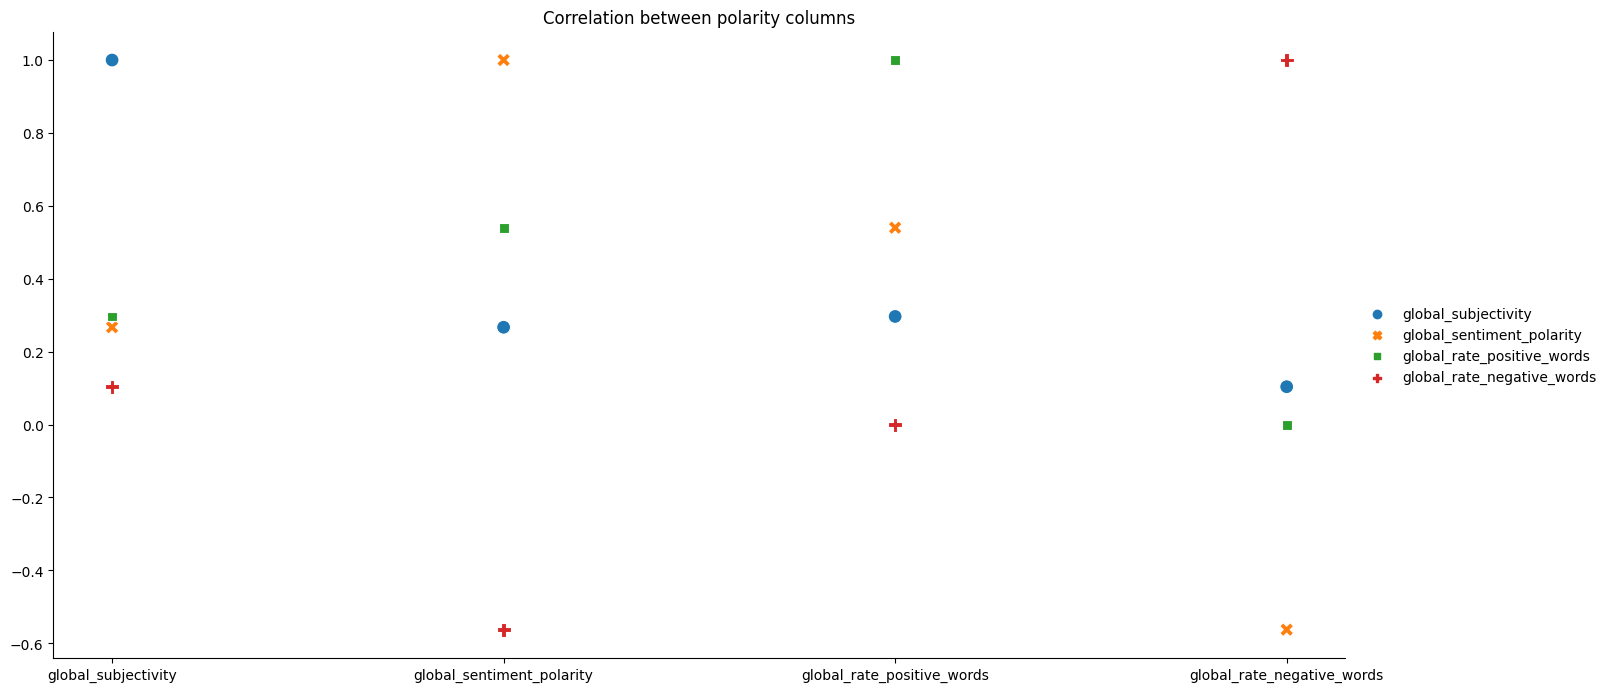

In [25]:
corr_polarity =  df_preprocessed.get_dataframe().loc[:, ['global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words']].corr()
_ = sns.relplot(corr_polarity, height = 7, aspect = 2, s = 100)
plt.title('Correlation between polarity columns')

# We may try some linear combinations.

Text(0.5, 1.0, 'Correlation between polarity columns')

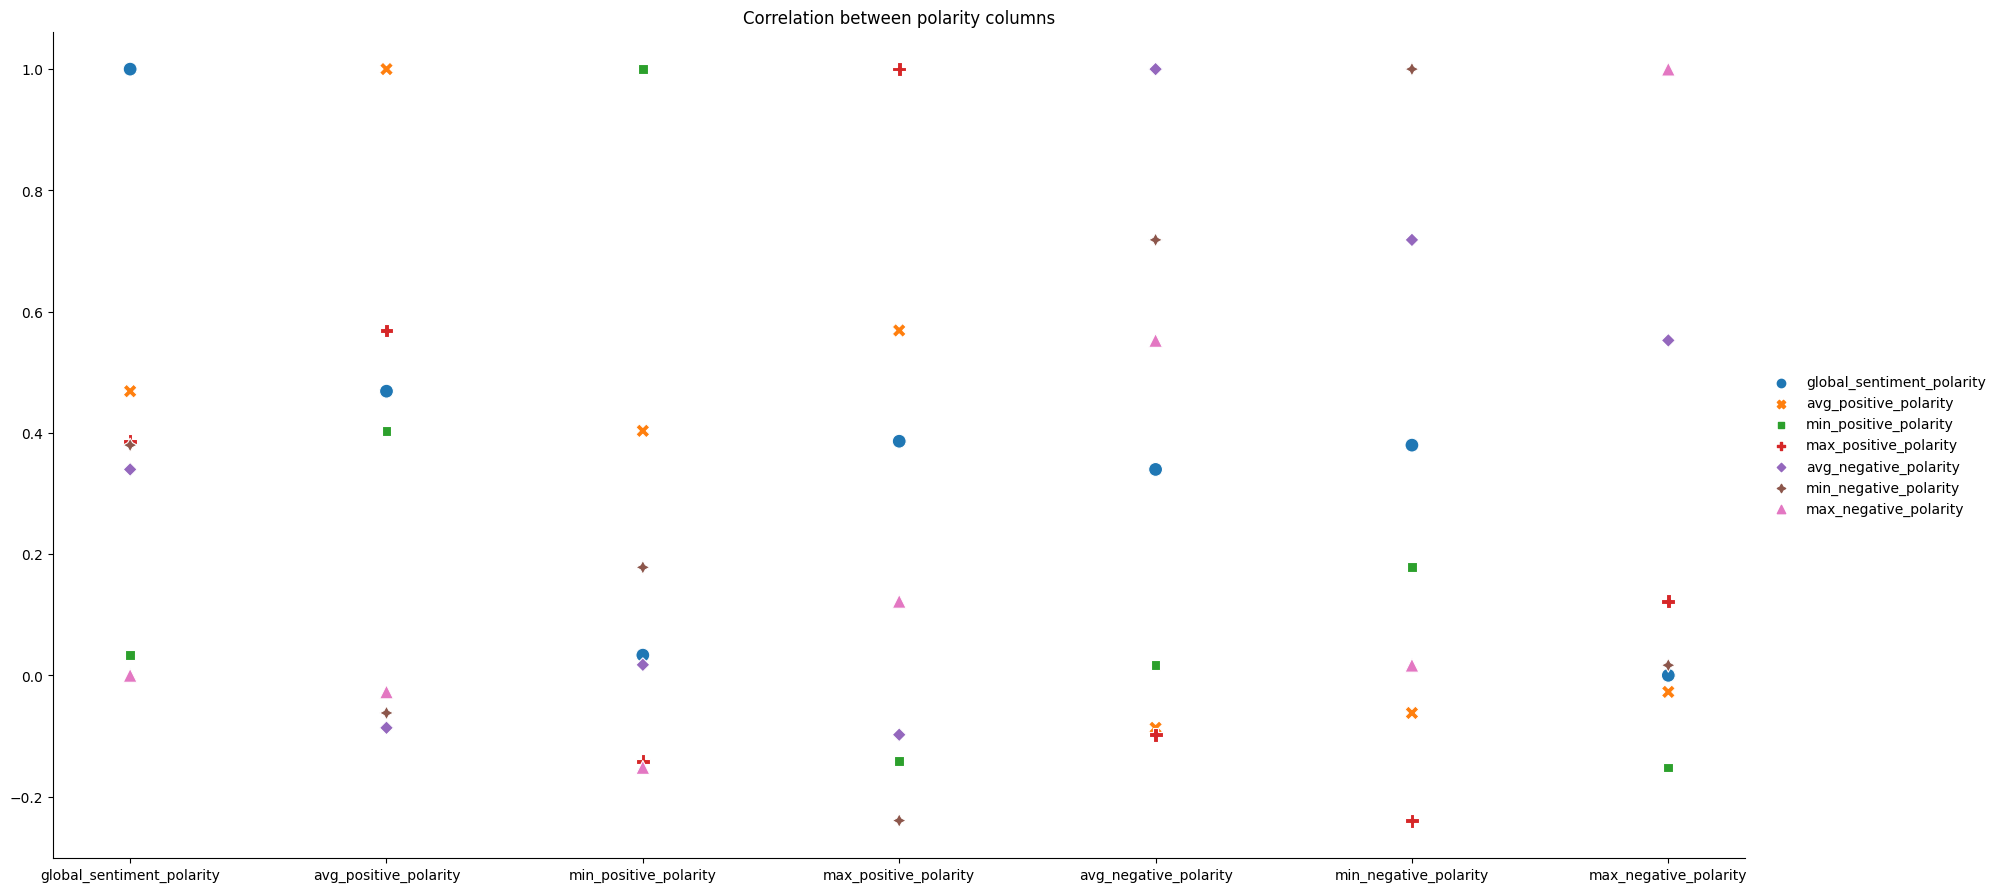

In [26]:
corr_polarity = df_preprocessed.get_dataframe().loc[:, ['global_sentiment_polarity', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity']].corr()
_ = sns.relplot(corr_polarity, height = 9, aspect = 2, s = 100)
plt.title('Correlation between polarity columns')

In [27]:
# As we did before, apply linear combinations to the polarity columns.

weights_positive_polarity = {
'min_positive_polarity' : 0.2,
'avg_positive_polarity' : 0.6,
'max_positive_polarity' : 0.2
}

weights_negative_polarity  = {
'min_negative_polarity' : 0.2,
'avg_negative_polarity' : 0.6,
'max_negative_polarity' : 0.2
}


_ = df_preprocessed.make_combination(weights_positive_polarity, 'positive_polarity', drop = True)
_ = df_preprocessed.make_combination(weights_negative_polarity, 'negative_polarity', drop = True)

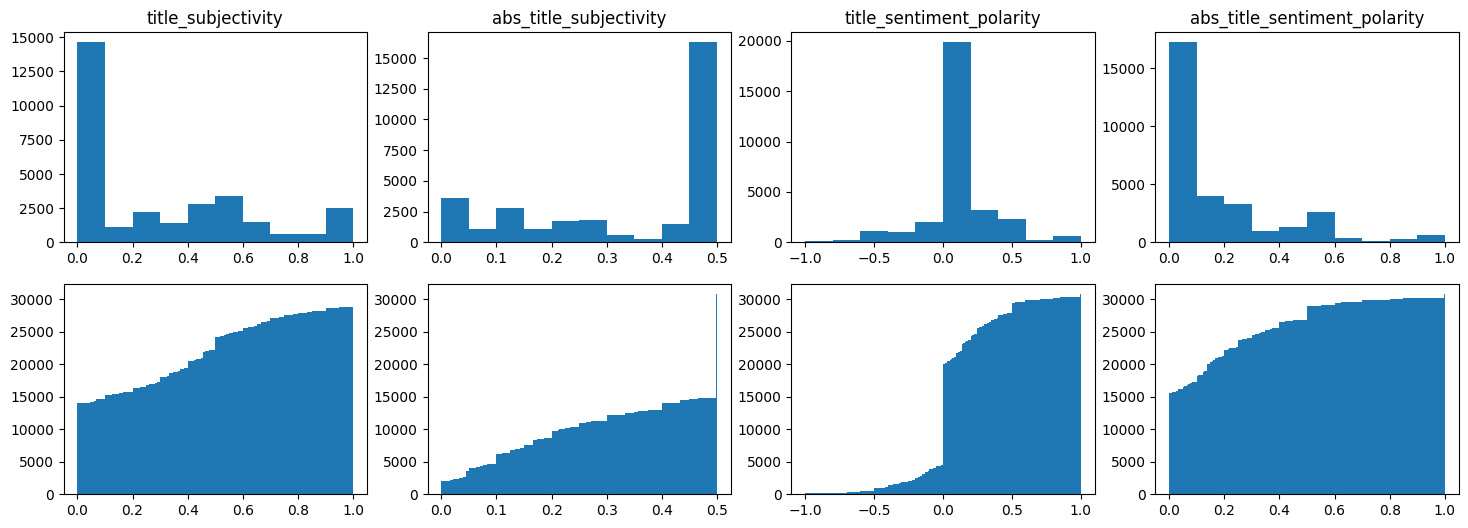

In [28]:
fig, ax = plt.subplots(2, 4, figsize = (18, 6))


_ = ax[0, 0].hist(df_preprocessed.get_dataframe()['title_subjectivity'], bins = 10)
ax[0, 0].set_title('title_subjectivity')
_ = ax[0, 1].hist(df_preprocessed.get_dataframe()['abs_title_subjectivity'], bins = 10)
ax[0, 1].set_title('abs_title_subjectivity')
_ = ax[0, 2].hist(df_preprocessed.get_dataframe()['title_sentiment_polarity'], bins = 10)
ax[0, 2].set_title('title_sentiment_polarity')
_ = ax[0, 3].hist(df_preprocessed.get_dataframe()['abs_title_sentiment_polarity'], bins = 10)
ax[0, 3].set_title('abs_title_sentiment_polarity')
_ = ax[1, 0].hist(df_preprocessed.get_dataframe()['title_subjectivity'], bins = 500, cumulative = True)
_ = ax[1, 1].hist(df_preprocessed.get_dataframe()['abs_title_subjectivity'], bins = 500, cumulative = True)
_ = ax[1, 2].hist(df_preprocessed.get_dataframe()['title_sentiment_polarity'], bins = 500, cumulative = True)
_ = ax[1, 3].hist(df_preprocessed.get_dataframe()['abs_title_sentiment_polarity'], bins = 500, cumulative = True)

**KEEP**
* title_subjectivity
* title_sentiment_polarity

**DISCARD**
* abs_title_subjectivity
* abs_title_sentiment_polarity


In [29]:
drop_columns = ['title_subjectivity', 'title_sentiment_polarity']

_ = df_preprocessed.get_dataframe().drop('title_subjectivity',axis=1)
_ = df_preprocessed.get_dataframe().drop('title_sentiment_polarity',axis=1)

Text(0.5, 1.0, 'Correlation between title columns')

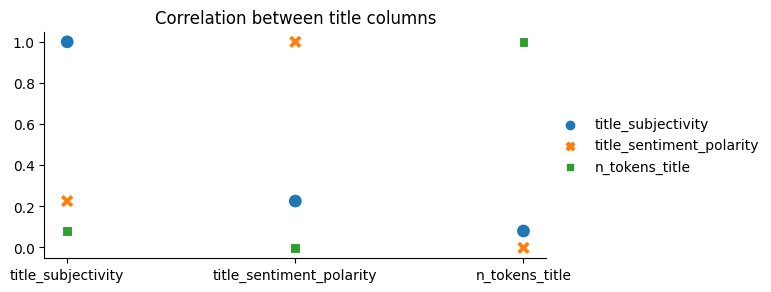

In [30]:
corr_polarity = df_preprocessed.get_dataframe().loc[:, ['title_subjectivity',
       'title_sentiment_polarity', 'n_tokens_title']].corr()
_ = sns.relplot(corr_polarity, height = 3, aspect = 2, s = 100)
plt.title('Correlation between title columns')



# Now features are uncorrelated

# Whole correlation

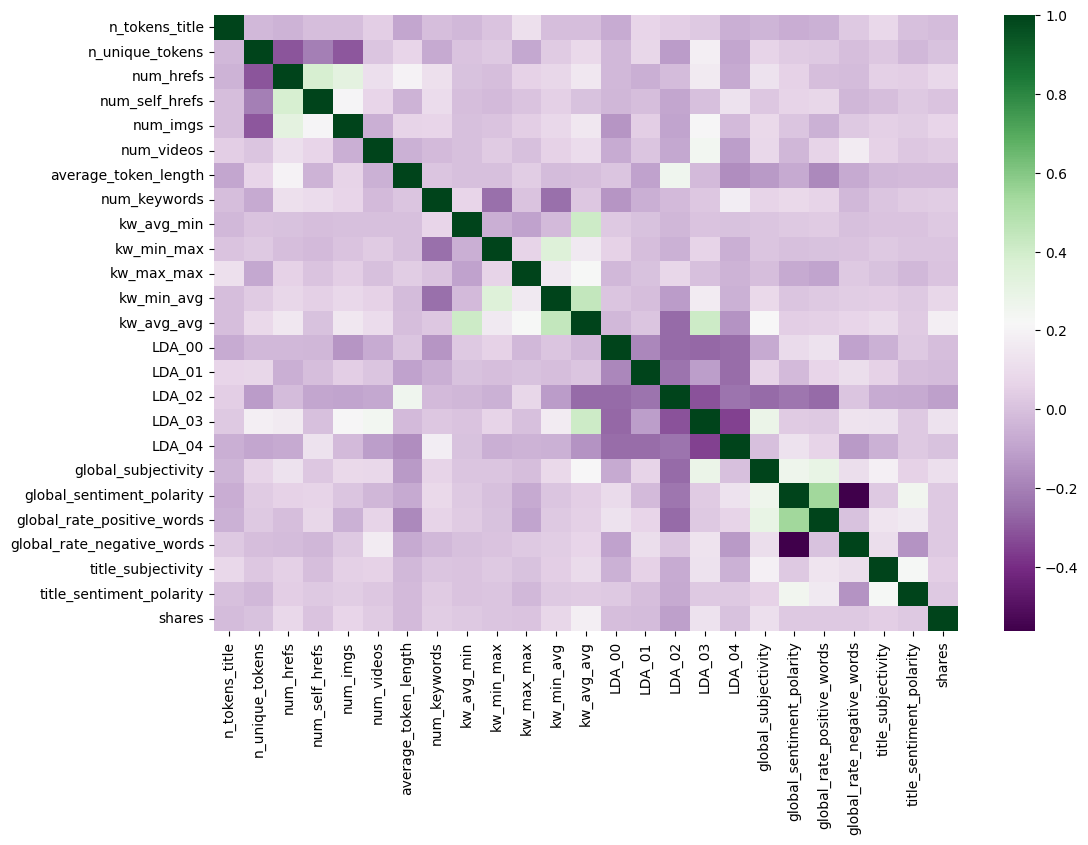

In [31]:
# Let's take a look to the whole correlation matrix.
corr_tot = df_preprocessed.get_dataframe().loc[:, ['n_tokens_title', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_min_avg', 'kw_avg_avg',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
        'title_subjectivity',
       'title_sentiment_polarity', 'shares']].corr()


_ = sns.heatmap(corr_tot, cmap = 'PRGn')

# Keywords

Text(38.50260416666666, 0.5, 'correlation')

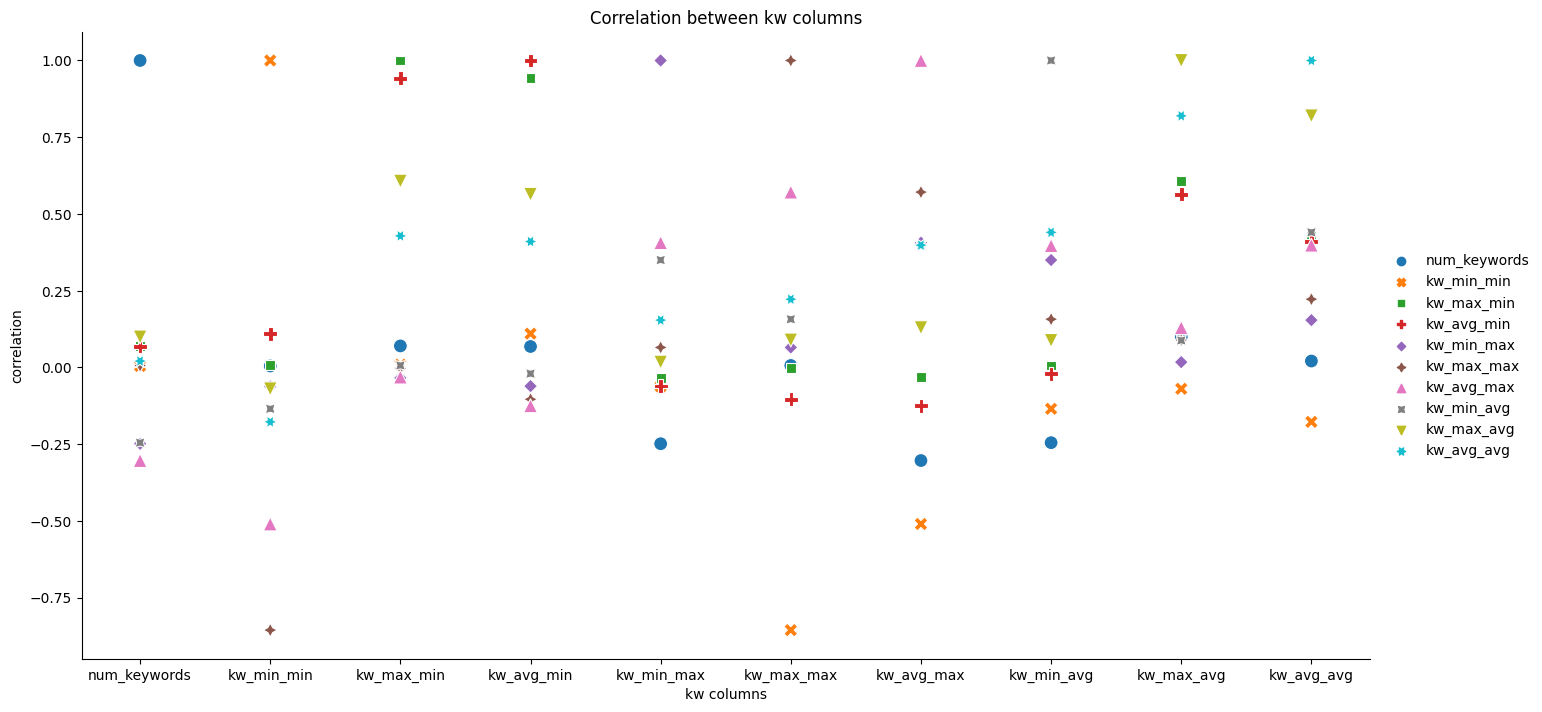

In [32]:
# Compute the linear correlation between kw.
corr_kw = df_preprocessed.get_dataframe().loc[:, 'num_keywords':'kw_avg_avg'].corr()

_ = sns.relplot(corr_kw, height = 7, aspect = 2, s = 100)
plt.title('Correlation between kw columns')
plt.xlabel('kw columns')
plt.ylabel('correlation')

* kw_max_min strongly positively correlated to kw_avg_min > 0.90
* kw_max_avg strongly positively correlated to kw_avg_avg > 0.80
* kw_min_min strongly negatively correlated to kw_max_max < -0.80

* kw_max_min quite positively correlated to kw_max_avg > 0.60
* kw_avg_min quite positively correlated to kw_max_avg > 0.60
* kw_max_max quite positively correlated to kw_avg_max > 0.60

We can safely discard some features. We choose to <br>

**KEEP**
* kw_avg_min 
* kw_avg_avg
* kw_avg_max

**DISCARD**
* kw_max_min
* kw_max_avg
* kw_min_min
* kw_max_max

We decide to drop kw_max_max because not so much informative. Instead, we decide to keep kw_avg_max and make a linear combination of the avg features.

Text(0.5, 1.0, 'log kw_max_max')

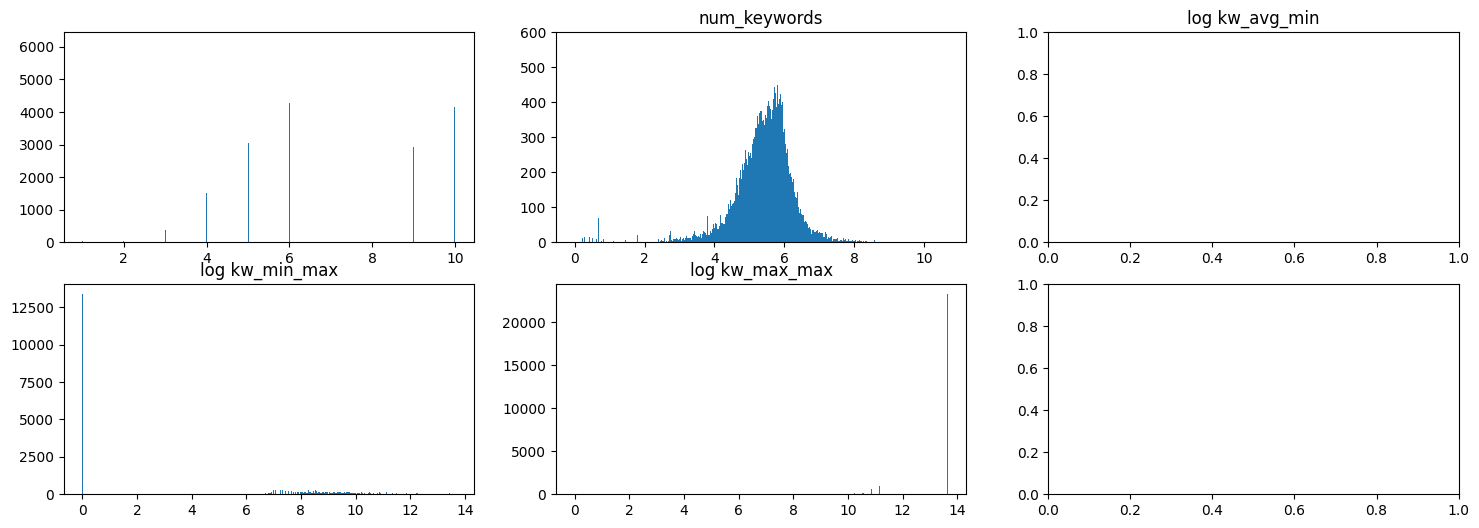

In [34]:
fig, ax = plt.subplots(2, 3, figsize = (18, 6))

# df_filtered_out = df_filtered[np.log1p(df_filtered['num_imgs']) < 3]
# df_filtered_out = df_filtered_out[np.log1p(df_filtered_out['num_videos']) < 2]

_ = ax[0, 0].hist(df_preprocessed.get_dataframe()['num_keywords'], bins = 500)
ax[0, 1].set_title('num_keywords')

_ = ax[0, 1].hist(np.log1p(df_preprocessed.get_dataframe()['kw_avg_min'] + 1), bins = 500)
ax[0, 2].set_title('log kw_avg_min')

_ = ax[1, 0].hist(np.log1p(df_preprocessed.get_dataframe()['kw_min_max']), bins = 500)
ax[1, 0].set_title('log kw_min_max')

_ = ax[1, 1].hist(np.log1p(df_preprocessed.get_dataframe()['kw_max_max']), bins = 500)
ax[1, 1].set_title('log kw_max_max')







In [ ]:
#Remove correlated columns
drop_kw = ['kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_min_avg', 'kw_max_avg']

_ = df_preprocessed.get_dataframe().drop(drop_kw)


weights = {
    'kw_avg_min' : 0.2,
    'kw_avg_avg' : 0.6,
    'kw_avg_max' : 0.2
    }

discard_negative = ['kw_avg_min', 'kw_avg_avg', 'kw_avg_max']
_ = df_preprocessed.apply_log1p(discard_negative, add_1 = True)


# LDA columns